<a href="https://colab.research.google.com/github/Swamp-Solutions/Litter-buster/blob/main/Notebooks/learning_iypnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model creation

# 1. Load dependencies and Google drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!pip install --upgrade pip
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt

In [ ]:
import torch,cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
FPATH = "./gdrive/MyDrive/litter-buster/test/"

### 2. Load model
Doing a test with yolov5 large

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5l')

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-7 Python-3.8.10 torch-1.13.1+cu116 CPU



  0%|          | 0.00/89.3M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


### 3. Train the model using the custom yaml-file and annotations.

In [ ]:
!python ./yolov5/train.py --img 640 --batch 64 --epochs 300 --data tobaccometal.yaml --weights yolov5l.pt

#### 4. Plot pretty graphs

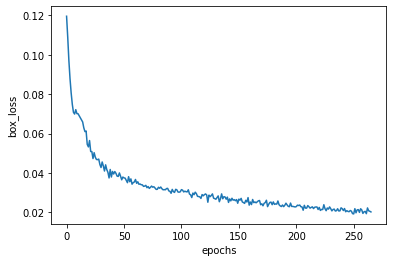

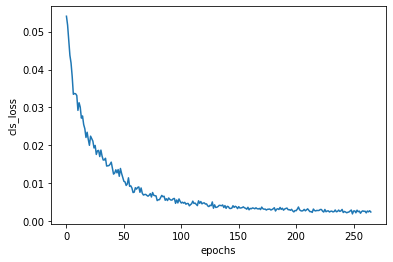

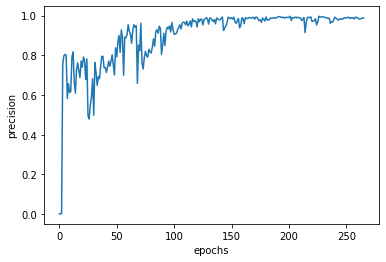

In [ ]:
df = pd.read_csv("./gdrive/MyDrive/litter-buster/test/exp2/results.csv")
df
plt.plot(df["               epoch"], df["      train/box_loss"])
plt.xlabel("epochs")
plt.ylabel("box_loss")
plt.show()
plt.plot(df["               epoch"], df["      train/cls_loss"])
plt.ylabel("cls_loss")
plt.xlabel("epochs")
plt.show()
plt.plot(df["               epoch"],df["   metrics/precision"])
plt.ylabel("precision")
plt.xlabel("epochs")
plt.show()